In [18]:
import sys
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from tqdm import tqdm

from pipeline import SearchEngine
from relevance import run_relevance_tests
from cf import CFRanker

In [19]:
DATA_PATH = '../data/'
RELEVANCE_TEST_PATH = DATA_PATH + 'relevance.test.csv'

In [20]:
ranker = CFRanker()

/home/zim/UMSI/PlugStation-Recommendation-System/src/cf.py:30: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  sample_df = pd.read_csv(
 11%|█         | 10/92 [00:00<00:01, 47.86it/s]

100%|██████████| 92/92 [00:01<00:00, 46.77it/s]


In [21]:
sim_index = ranker.sim_index

In [22]:
dataset_df = pd.read_csv(
    '../data/Google_Map_review_data_AA_DTW.csv', sep=',', header=0)
authors_list = dataset_df.author_name.unique()
stations_list = []
coor_list = set()
for row in dataset_df.itertuples():
    if (float(row.lat), float(row.lng)) not in coor_list:
        coor_list.add((float(row.lat), float(row.lng)))
        stations_list.append(row.name)
score_index = pd.DataFrame(
    index=stations_list, columns=authors_list)
for row in dataset_df.itertuples():
    score_index.loc[row.name, row.author_name] = row.rating
score_index.reset_index(drop=True, inplace=True)
score_index.head()

,P & M Eastman,Jeff Frank,Andrew Kennaugh,santosh lalwani,Trel Nadal,Benjamin Meza-Wilson,Alex Aquino,michael graf,Sarah Cohen,Benjamin Meza,...,James Adams,Anand Patil,Periwinkle,Kathy T,Chris Fisher,jobo daHobo,Sean Doran,Laura Lindsay,Venkat Didugu,Russell DuRoss
0,5,3,4,5,5,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,5,5,NaN,NaN,NaN,...,5,1,4,5,5,5,5,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,4,4,5,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
row_means = score_index.mean(axis=1, skipna=True)
score_index = score_index.apply(lambda row: row - row_means[row.name] if np.isfinite(row.sum()) else row, axis=1)
score_index.head()

,P & M Eastman,Jeff Frank,Andrew Kennaugh,santosh lalwani,Trel Nadal,Benjamin Meza-Wilson,Alex Aquino,michael graf,Sarah Cohen,Benjamin Meza,...,James Adams,Anand Patil,Periwinkle,Kathy T,Chris Fisher,jobo daHobo,Sean Doran,Laura Lindsay,Venkat Didugu,Russell DuRoss
0,1.44,-0.56,0.44,1.44,1.44,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,1.551402,1.551402,NaN,NaN,NaN,...,1.551402,-2.448598,0.551402,1.551402,1.551402,1.551402,1.551402,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,0.777778,0.777778,1.777778,0.777778,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
ranker.get_prediction(50, 80)

/home/zim/UMSI/PlugStation-Recommendation-System/src/cf.py:96: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if np.isnan(self.score_index.iloc[j][x]):
/home/zim/UMSI/PlugStation-Recommendation-System/src/cf.py:98: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sum += self.sim_index[i][j] * self.score_index.iloc[j][x]


1.0000000000000013

In [25]:
search_engine = SearchEngine(cf=False, l2r=False)

/home/zim/UMSI/PlugStation-Recommendation-System/src/pipeline.py:36: DtypeWarning: Columns (10,25,27) have mixed types. Specify dtype option on import or set low_memory=False.
  self.main_index = pd.read_csv(DATASET_PATH, delimiter='\t')


Loading indexes...
Loading ranker...
Search Engine initialized!


In [26]:
search_engine.ranker.query('42.3012724951137, -83.71906207399091')

/home/zim/UMSI/PlugStation-Recommendation-System/src/ranker.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_docs['score'] = relevant_docs.apply(


[[33257.0, 0.5797476233191815], [33258.0, 0.5797476233191815]]

In [27]:
search_engine.pipeline.query('42.3012724951137, -83.71906207399091')

/home/zim/UMSI/PlugStation-Recommendation-System/src/ranker.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_docs['score'] = relevant_docs.apply(


[[33257.0, 0.5797476233191815], [33258.0, 0.5797476233191815]]

In [28]:
overall_scores = []

In [29]:
def log_scores(overall_scores, score, idx):
    for item in score['map_list']:
        overall_scores.append({
            'model': idx, 
            'score': item,
            'metric': 'map'
        })
    for item in score['ndcg_list']:
        overall_scores.append({
            'model': idx, 
            'score': item,
            'metric': 'ndcg'
        })
    return overall_scores

In [30]:
score = run_relevance_tests(RELEVANCE_TEST_PATH, search_engine.pipeline)
log_scores(overall_scores, score, 0)

  0%|          | 0/38 [00:00<?, ?it/s]/home/zim/UMSI/PlugStation-Recommendation-System/src/ranker.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_docs['score'] = relevant_docs.apply(
/home/zim/UMSI/PlugStation-Recommendation-System/src/ranker.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_docs['score'] = relevant_docs.apply(
/home/zim/UMSI/PlugStation-Recommendation-System/src/ranker.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

MAP:  [0.0125, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.025, 0, 0, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0.034722222222222224, 0, 0, 0, 0, 0, 0, 0, 0.12857142857142856, 0, 0, 0, 0, 0]
NDCG:  [0.23305781766536982, 0.0, 0, 0, 0.0, 0.09138637028484595, 0, 0.11128410866442684, 0, 0.06092424685656397, 0.12578267902857923, 0.0984005490287911, 0, 0.0, 0.04920027451439555, 0.20698480740207348, 0.0, 0.11464875722023267, 0.06192385945988927, 0, 0.0, 0, 0.0, 0.14484396997849897, 0.14053040633892672, 0.0, 0.0, 0.0, 0.055189942893075224, 0.031041917075015645, 0, 0.08986859162485021, 0.2619179107921319, 0.0945257492621918, 0.0, 0.0, 0, 0.03557791873909471]


[{'model': 0, 'score': 0.0125, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0.025, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0.5, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score'

In [31]:
search_engine.set_l2r(True)
score = run_relevance_tests(RELEVANCE_TEST_PATH, search_engine.pipeline)
log_scores(overall_scores, score, 1)

/home/zim/UMSI/PlugStation-Recommendation-System/src/pipeline.py:73: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  features_df = pd.read_csv('../data/processed_nrel.csv')


Loading l2r ranker...


4161it [00:00, 1091190.38it/s]
  0%|          | 0/268 [00:00<?, ?it/s]/home/zim/UMSI/PlugStation-Recommendation-System/src/ranker.py:193: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  score = 1 / (1 + distance.distance((query_parts[0], query_parts[1]), (doc.Latitude, doc.Longitude)).km)
/home/zim/UMSI/PlugStation-Recommendation-System/src/ranker.py:195: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  score = 1 / (1 + distance.distance((query_parts[0], query_parts[1]), (doc[0], doc[1])).km)
 48%|████▊     | 128/268 [00:00<00:00, 421.36it/s]

100%|██████████| 268/268 [00:00<00:00, 427.11it/s]


Training model...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000222 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 850
[LightGBM] [Info] Number of data points in the train set: 4161, number of used features: 14


  0%|          | 0/38 [00:00<?, ?it/s]/home/zim/UMSI/PlugStation-Recommendation-System/src/l2r.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_docs['score'] = relevant_docs.apply(
/home/zim/UMSI/PlugStation-Recommendation-System/src/ranker.py:193: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  score = 1 / (1 + distance.distance((query_parts[0], query_parts[1]), (doc.Latitude, doc.Longitude)).km)
/home/zim/UMSI/PlugStation-Recommendation-System/src/ranker.py:195: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future

MAP:  [0.025, 0, 0, 0, 0, 0.05, 0, 0, 0, 0, 0, 0.1, 0, 0, 0.05, 0.25, 0, 0, 0, 0, 0, 0, 0, 0, 0.05, 0, 0, 0, 0, 0.2, 0, 0, 0.26, 0, 0, 0.014285714285714285, 0, 0]
NDCG:  [0.1650383640745585, 0.0, 0, 0, 0.0, 0.2555061957526911, 0, 0.11128410866442684, 0, 0.048281323326166324, 0.17924027872223225, 0.1968010980575822, 0, 0.0, 0.21432658944729752, 0.20698480740207348, 0.0, 0.04937653214700188, 0.14499005556689318, 0, 0.09554012972814582, 0, 0.0, 0.14484396997849897, 0.24140661663083163, 0.0, 0.0, 0.0, 0.055189942893075224, 0.4428024706295599, 0, 0.08986859162485021, 0.5693009096484647, 0.0945257492621918, 0.0, 0.08599077185933322, 0, 0.03150858308739727]


[{'model': 0, 'score': 0.0125, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0.025, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0.5, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score'

In [34]:
search_engine.set_l2r(False)
search_engine.set_cf(True)

/home/zim/UMSI/PlugStation-Recommendation-System/src/cf.py:30: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  sample_df = pd.read_csv(


Loading cf ranker...


100%|██████████| 92/92 [00:01<00:00, 48.09it/s]


In [32]:
overall_scores = pd.DataFrame(overall_scores)
overall_scores

,model,score,metric
0,0,0.012500,map
1,0,0.000000,map
2,0,0.000000,map
3,0,0.000000,map
4,0,0.000000,map
...,...,...,...
147,1,0.094526,ndcg
148,1,0.000000,ndcg
149,1,0.085991,ndcg
150,1,0.000000,ndcg


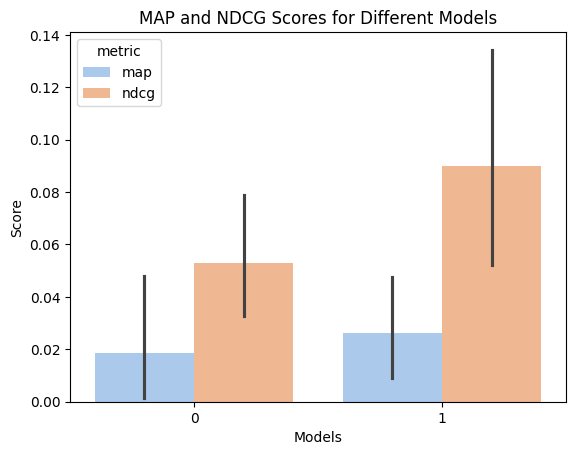

In [33]:
plot = sns.barplot(x='model', y='score', hue='metric',
                   data=overall_scores, palette='pastel')
models_list = ['dist', 'l2r']
plot.set_xlabel('Models')
plot.set_ylabel('Score')
plot.set_title('MAP and NDCG Scores for Different Models')
plt.show()